In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score



import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
print( ' these are the rows of df  ' , df.shape)
print( ' ------------------------- ' ,  df.info())


 these are the rows of df   (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    f

In [5]:
df =  df.drop(['Unnamed: 32'],axis = 1)

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

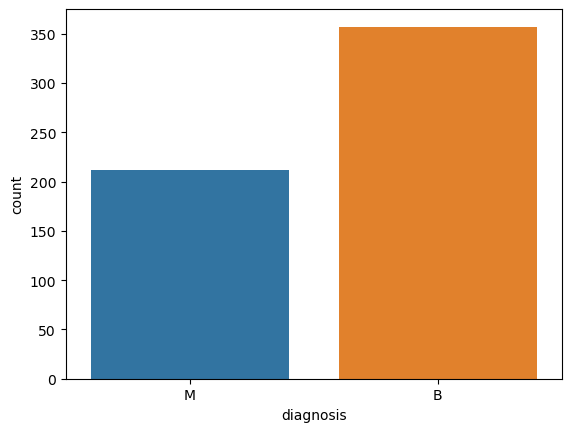

In [9]:
sns.countplot(x= 'diagnosis' ,data =df)
plt.show()

In [10]:
df["diagnosis"] = df["diagnosis"].replace({'M':1,'B':0})

In [11]:
x = df.drop("diagnosis",axis = 1)
y = df.diagnosis

In [12]:
x 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [14]:
from sklearn.feature_selection import SelectKBest , f_classif

In [15]:
best_feature = SelectKBest(score_func=f_classif,k=18)

fit = best_feature.fit(x,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(x.columns)

feature_score = pd.concat([df_columns,df_scores],axis = 1)

feature_score.columns = ["feature_name",'score']

print(feature_score.nlargest(18,'score'))

            feature_name       score
28  concave points_worst  964.385393
23       perimeter_worst  897.944219
8    concave points_mean  861.676020
21          radius_worst  860.781707
3         perimeter_mean  697.235272
24            area_worst  661.600206
1            radius_mean  646.981021
4              area_mean  573.060747
7         concavity_mean  533.793126
27       concavity_worst  436.691939
6       compactness_mean  313.233079
26     compactness_worst  304.341063
11             radius_se  268.840327
13          perimeter_se  253.897392
14               area_se  243.651586
22         texture_worst  149.596905
25      smoothness_worst  122.472880
29        symmetry_worst  118.860232


In [16]:
new_X = df[["concave points_worst","perimeter_worst","concave points_mean",'radius_worst','perimeter_mean','area_worst','concavity_mean','concavity_worst','compactness_mean','radius_se','perimeter_se','area_se','texture_worst','smoothness_worst','symmetry_worst']]

In [17]:
new_X.describe()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,concavity_mean,concavity_worst,compactness_mean,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst,symmetry_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.114606,107.261213,0.048919,16.269190,91.969033,880.583128,0.088799,0.272188,0.104341,0.405172,2.866059,40.337079,25.677223,0.132369,0.290076
std,0.065732,33.602542,0.038803,4.833242,24.298981,569.356993,0.079720,0.208624,0.052813,0.277313,2.021855,45.491006,6.146258,0.022832,0.061867
min,0.000000,50.410000,0.000000,7.930000,43.790000,185.200000,0.000000,0.000000,0.019380,0.111500,0.757000,6.802000,12.020000,0.071170,0.156500
25%,0.064930,84.110000,0.020310,13.010000,75.170000,515.300000,0.029560,0.114500,0.064920,0.232400,1.606000,17.850000,21.080000,0.116600,0.250400
50%,0.099930,97.660000,0.033500,14.970000,86.240000,686.500000,0.061540,0.226700,0.092630,0.324200,2.287000,24.530000,25.410000,0.131300,0.282200
75%,0.161400,125.400000,0.074000,18.790000,104.100000,1084.000000,0.130700,0.382900,0.130400,0.478900,3.357000,45.190000,29.720000,0.146000,0.317900
max,0.291000,251.200000,0.201200,36.040000,188.500000,4254.000000,0.426800,1.252000,0.345400,2.873000,21.980000,542.200000,49.540000,0.222600,0.663800


In [18]:
scaler = StandardScaler()
x_scalar=scaler.fit_transform(x)

In [19]:
x_scalar

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar,y,test_size = 0.25,random_state = 348)

In [21]:
def metric_score(clh, x_train,x_test,y_train,y_test , train = True):
    if train:
        y_pred = clh.predict(x_train)
        
        
        print('/======================traning Result=========================')
        
        print(f'Accuracy score : {accuracy_score(y_train,y_pred)* 100   }')
        
        
        
    elif train == False:
        pred =  clh.predict(x_test)
        
        print("/n ====================== test Resutl=============================")
        
        print(f'Accuracy  score:  {accuracy_score(y_test,pred)* 100}')
        
        
        print ('------ test classification report ', classification_report(y_test,pred,))

In [22]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
metric_score(knn,x_train,x_test,y_train,y_test,train =True)
metric_score(knn,x_train,x_test,y_train,y_test,train = False)

/======================traning Result=========================
Accuracy score : 98.59154929577466
/n ====================== test Resutl=============================
Accuracy  score:  95.8041958041958
------ test classification report                precision    recall  f1-score   support

           0       0.95      0.98      0.97        85
           1       0.96      0.93      0.95        58

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [24]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn,x_scalar,y,cv=5)

array([0.97368421, 0.95614035, 0.99122807, 0.95614035, 0.95575221])

In [25]:
cross_val_score(knn,x_scalar,y, cv = 5).mean()

0.9665890389691041

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = { 'algorithm':[ 'kd_tree', 'brute'],
               'leaf_size':[ 3,5,6,7,8],
               'n_neighbors':[ 3,5,7,9,11,13]}

In [28]:
gridsearch  = GridSearchCV(estimator=knn,param_grid = param_grid)

In [29]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [32]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [34]:
gridsearch.best_score_

0.9694938440492477

In [35]:
knn =  KNeighborsClassifier(algorithm = 'kd_tree',leaf_size = 3, n_neighbors= 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [36]:
metric_score(knn,x_train,x_test,y_train,y_test , train = True)
metric_score(knn,x_train,x_test,y_train,y_test,train = False)

/======================traning Result=========================
Accuracy score : 98.82629107981221
/n ====================== test Resutl=============================
Accuracy  score:  95.8041958041958
------ test classification report                precision    recall  f1-score   support

           0       0.95      0.98      0.97        85
           1       0.96      0.93      0.95        58

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

